# Building machine learning model for Human_DNA_Classifier for the given DNA sequence

### Load essential Library

In [7]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

### Load the data set and analyze the details

In [17]:
df = pd.read_table(r"C:\Users\Puran Prakash Sinha\Desktop\Data Science\Python\NLP\human_data.txt")

C:\Users\Puran Prakash Sinha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [18]:
df.head(2)

,sequence,cls
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4


### Visualize various classses of human data

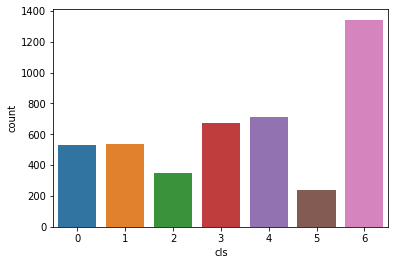

In [19]:
sns.countplot(df['cls'])

### Preprocessing: Break sequence into chunksize of 6

In [24]:
df.sequence[0]

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

In [26]:
data= df.sequence[0]

In [31]:
#[data[i:i+6] for i in range(len(data))]

In [36]:
def seqPreprocessor(seq):
    seq = seq.lower()
    sow = [seq[i:i+6] for i in range(len(seq))]
    sow = " ".join(sow)
    return(sow)
print(seqPreprocessor(df.sequence[0]))

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

### Apply function to whole sequence using lambda fucntion

In [37]:
lam = lambda x:seqPreprocessor(x)

In [38]:
df.sequence = df.sequence.apply(lam)

In [39]:
df.sequence

0       atgccc tgcccc gcccca ccccaa cccaac ccaact caac...
1       atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaa...
2       atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
3       atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
4       atgcaa tgcaac gcaaca caacag aacagc acagca cagc...
5       atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
6       atgaag tgaaga gaagat aagatt agattg gattgc attg...
7       atgcaa tgcaac gcaaca caacag aacagc acagca cagc...
8       atgaag tgaaga gaagat aagatt agattg gattgc attg...
9       atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
10      atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
11      atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
12      atgaag tgaaga gaagat aagatt agattg gattgc attg...
13      atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
14      atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
15      atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
16      atggcg tggcgg ggcgga gcggat cggatt ggattc gatt...
17      atggcg

### Create BOW (bag of words) using Count Vectorizer with ngrams of 4,4 and Create train and test data

In [41]:
X = df.sequence
y = df["cls"]

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=10)

In [98]:
#cv = CountVectorizer() # with this accuracy is 68%
cv = CountVectorizer(ngram_range=(4,4)) #

In [99]:
X_train_dtm = cv.fit_transform(X_train)

In [100]:
X_train_dtm

<3504x234624 sparse matrix of type '<class 'numpy.int64'>'
	with 4355746 stored elements in Compressed Sparse Row format>

In [101]:
X_test_dtm = cv.transform(X_test)

### Create MultinomialNB() instance for training and testing
> https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/

### Fit and transform the data

In [102]:
nb = MultinomialNB()

In [103]:
nb.fit(X_train_dtm,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### get feature names after transforming

In [104]:
cv.get_feature_names()

['aaaaa aaaa aaa aa',
 'aaaaaa aaaaa aaaa aaa',
 'aaaaaa aaaaaa aaaaaa aaaaaa',
 'aaaaaa aaaaaa aaaaaa aaaaac',
 'aaaaaa aaaaaa aaaaaa aaaaag',
 'aaaaaa aaaaaa aaaaaa aaaaat',
 'aaaaaa aaaaaa aaaaac aaaaca',
 'aaaaaa aaaaaa aaaaac aaaacc',
 'aaaaaa aaaaaa aaaaac aaaacg',
 'aaaaaa aaaaaa aaaaac aaaact',
 'aaaaaa aaaaaa aaaaag aaaaga',
 'aaaaaa aaaaaa aaaaag aaaagc',
 'aaaaaa aaaaaa aaaaag aaaagg',
 'aaaaaa aaaaaa aaaaag aaaagt',
 'aaaaaa aaaaaa aaaaat aaaata',
 'aaaaaa aaaaaa aaaaat aaaatc',
 'aaaaaa aaaaaa aaaaat aaaatg',
 'aaaaaa aaaaaa aaaaat aaaatt',
 'aaaaaa aaaaac aaaaca aaacaa',
 'aaaaaa aaaaac aaaaca aaacac',
 'aaaaaa aaaaac aaaaca aaacag',
 'aaaaaa aaaaac aaaaca aaacat',
 'aaaaaa aaaaac aaaacc aaacca',
 'aaaaaa aaaaac aaaacc aaaccc',
 'aaaaaa aaaaac aaaacc aaaccg',
 'aaaaaa aaaaac aaaacc aaacct',
 'aaaaaa aaaaac aaaacg aaacga',
 'aaaaaa aaaaac aaaacg aaacgc',
 'aaaaaa aaaaac aaaacg aaacgg',
 'aaaaaa aaaaac aaaact aaacta',
 'aaaaaa aaaaac aaaact aaactc',
 'aaaaaa aaaaac aaaact a

In [105]:
len(cv.get_feature_names())

234624

### Train and prediction

In [106]:
y_pred = nb.predict(X_test_dtm)
y_pred

array([5, 1, 4, 3, 2, 2, 3, 4, 0, 1, 3, 0, 6, 6, 4, 3, 1, 1, 4, 2, 6, 3,
       0, 2, 3, 5, 0, 4, 6, 0, 1, 6, 1, 5, 6, 3, 4, 4, 4, 1, 2, 6, 5, 6,
       6, 4, 4, 3, 4, 0, 6, 1, 1, 6, 1, 4, 6, 4, 0, 1, 6, 4, 3, 0, 6, 0,
       1, 6, 4, 6, 2, 3, 4, 6, 4, 2, 1, 1, 6, 6, 0, 4, 6, 6, 3, 5, 6, 2,
       6, 4, 1, 3, 6, 1, 1, 6, 6, 0, 4, 6, 4, 3, 0, 2, 6, 0, 4, 2, 6, 0,
       1, 6, 6, 1, 0, 6, 6, 0, 6, 6, 2, 3, 6, 2, 4, 4, 2, 5, 4, 5, 6, 1,
       1, 6, 3, 4, 0, 3, 4, 3, 6, 0, 0, 0, 6, 6, 6, 6, 1, 2, 3, 1, 3, 5,
       0, 4, 2, 6, 6, 1, 6, 4, 3, 1, 3, 6, 2, 5, 2, 4, 0, 6, 6, 4, 6, 3,
       1, 0, 6, 6, 6, 1, 6, 3, 4, 4, 1, 6, 1, 2, 1, 0, 0, 3, 4, 0, 6, 6,
       6, 3, 6, 5, 6, 6, 3, 4, 6, 3, 4, 4, 6, 4, 0, 1, 1, 1, 2, 5, 6, 3,
       4, 1, 6, 6, 4, 2, 0, 6, 4, 0, 4, 0, 1, 6, 4, 3, 3, 4, 3, 5, 1, 2,
       4, 6, 3, 0, 0, 4, 6, 6, 4, 2, 4, 1, 1, 3, 3, 6, 1, 6, 3, 0, 1, 2,
       1, 2, 1, 6, 5, 3, 4, 6, 1, 2, 4, 6, 6, 1, 4, 0, 4, 6, 1, 4, 6, 3,
       6, 2, 3, 6, 0, 4, 1, 6, 1, 4, 2, 4, 5, 2, 5,

### Accuracy score

In [107]:
accuracy_score(y_test,y_pred)*100

97.8310502283105

### Display confusion matrix

In [108]:
confusion_matrix(y_test,y_pred)

array([[ 94,   0,   0,   0,   4,   0,   1],
       [  1, 121,   0,   1,   0,   0,   0],
       [  0,   0,  71,   0,   0,   0,   1],
       [  0,   0,   0, 124,   3,   0,   0],
       [  2,   1,   0,   0, 152,   1,   0],
       [  0,   0,   0,   0,   1,  40,   0],
       [  0,   0,   0,   0,   3,   0, 255]], dtype=int64)

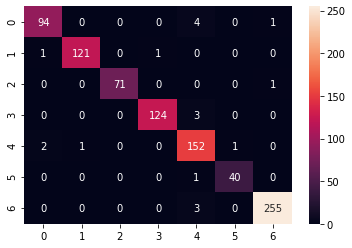

In [109]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

### Display classification report

In [110]:
print(classification_report(y_test,y_pred),)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        99
           1       0.99      0.98      0.99       123
           2       1.00      0.99      0.99        72
           3       0.99      0.98      0.98       127
           4       0.93      0.97      0.95       156
           5       0.98      0.98      0.98        41
           6       0.99      0.99      0.99       258

    accuracy                           0.98       876
   macro avg       0.98      0.98      0.98       876
weighted avg       0.98      0.98      0.98       876

